<a href="https://colab.research.google.com/github/rushi-k12/Basic_Neural_Networks_/blob/main/proj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import loadtxt
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
!unzip /content/churn.zip

Archive:  /content/churn.zip
  inflating: Churn.csv               


In [ ]:
df = pd.read_csv("/content/Churn.csv")

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [ ]:
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [ ]:
x = df.drop(columns = ['Exited'])
y = df['Exited']
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head(3)

KeyError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=108)

In [ ]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
train_x_scal = scal.fit_transform(train_x)
test_x_scal = scal.fit_transform(test_x)


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

#input layer
model.add(Dense(3,activation='sigmoid',input_dim=11))
#output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam')

In [ ]:
hist = model.fit(train_x_scal , train_y , epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4996
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4691
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4542
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4445
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4377
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4329
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4295
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4270
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4252
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4237


In [ ]:
hist.history

{'loss': [0.4996144473552704,
  0.469109445810318,
  0.4541637897491455,
  0.4444810748100281,
  0.4377478361129761,
  0.43292686343193054,
  0.4295032024383545,
  0.4269910454750061,
  0.42518851161003113,
  0.42367443442344666]}

<function matplotlib.pyplot.show(close=None, block=None)>

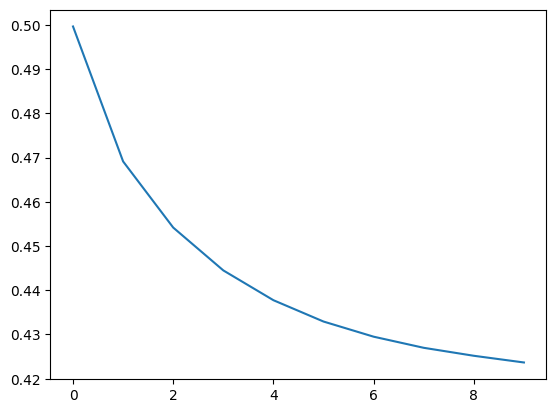

In [ ]:
plt.plot(hist.history['loss'])
plt.show

In [ ]:
model.layers[0].get_weights()

[array([[-0.14429295,  0.11429232,  0.21668467],
        [-0.86738026, -2.3225849 , -1.2671822 ],
        [-0.06678996,  0.30404738,  0.02292815],
        [-0.35686815,  0.2683843 , -0.3471108 ],
        [ 0.7629423 , -0.0949043 , -0.02969189],
        [ 0.0034731 ,  0.10116608,  0.06708877],
        [ 0.55162513,  0.47288275,  0.75045574],
        [-0.21522352,  0.26292518, -0.11389266],
        [-0.17228092, -0.6537593 , -0.73250073],
        [ 0.2463285 , -0.13206811, -0.13586542],
        [ 0.3118345 ,  0.46825686,  0.4856593 ]], dtype=float32),
 array([0.21210462, 0.24630776, 0.12691335], dtype=float32)]

In [ ]:
model.layers[1].get_weights()

[array([[-1.0061498],
        [-0.8933129],
        [-1.3714135]], dtype=float32),
 array([0.10994741], dtype=float32)]

In [ ]:
model.predict(test_x_scal)

63/63 [==============================] - 1s 3ms/step


array([[0.18654338],
       [0.09475276],
       [0.11472201],
       ...,
       [0.0988325 ],
       [0.09860458],
       [0.07385086]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.where(model.predict(test_x_scal)>0.5,1,0)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y,y_pred)

0.7945

In [ ]:
model = Sequential()

#input layer
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

hist_ = model.fit(train_x_scal, train_y,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.5908 - accuracy: 0.6959 - val_loss: 0.4655 - val_accuracy: 0.8100
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7959 - val_loss: 0.4346 - val_accuracy: 0.8087
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7983 - val_loss: 0.4267 - val_accuracy: 0.8163
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.8023 - val_loss: 0.4218 - val_accuracy: 0.8163
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8094 - val_loss: 0.4172 - val_accuracy: 0.8213
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8184 - val_loss: 0.4130 - val_accuracy: 0.8231
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8253 - val_loss: 0.4062 - val_accuracy: 0.8313

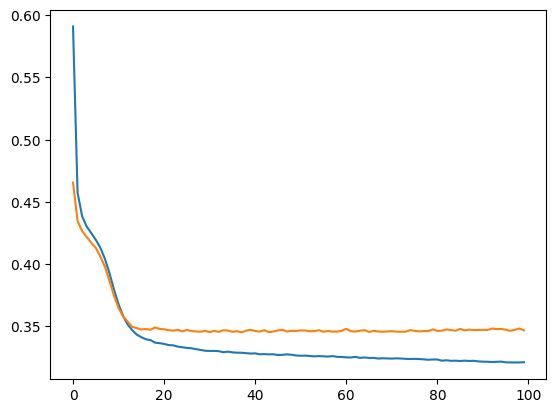

In [ ]:
plt.plot(hist_.history['loss'])
plt.plot(hist_.history['val_loss'])
plt.show()

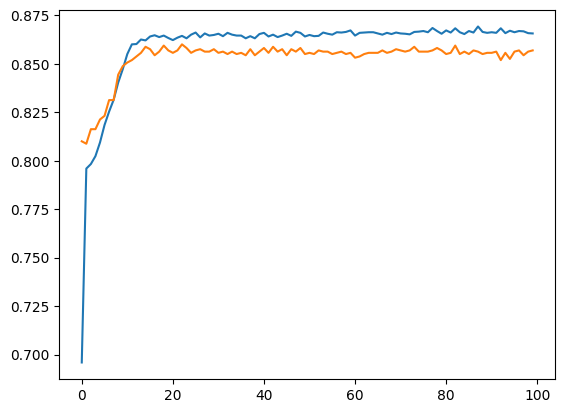

In [ ]:
plt.plot(hist_.history['accuracy'])
plt.plot(hist_.history['val_accuracy'])
plt.show()

In [ ]:
y_pred = np.where(model.predict(test_x_scal)>0.5,1,0)


63/63 [==============================] - 0s 1ms/step


In [ ]:
accuracy_score(test_y,y_pred)


0.8495